In [6]:
 !pip install ultralytics

## Import required libraries

In [7]:
import cv2
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os
import re
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Load a pretrained YOLO model

In [8]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 48.8MB/s]


## Training the model with Coco dataset

In [9]:
model.train(data="coco8.yaml", epochs=3)  # train the model

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

100%|██████████| 433k/433k [00:00<00:00, 8.94MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 1082.48file/s]

Dataset download success ✅ (1.0s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 115.28it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 484.26it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.408      3.273      1.584         37        640: 100%|██████████| 1/1 [00:04<00:00,  4.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all          4         17      0.901      0.523      0.721      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.255      3.035      1.529         39        640: 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all          4         17      0.906      0.532      0.743      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.291      3.948      1.649         18        640: 100%|██████████| 1/1 [00:04<00:00,  4.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all          4         17      0.908      0.537      0.752      0.514



3 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]


                   all          4         17      0.906      0.532      0.743      0.517
                person          4         10      0.939        0.3       0.53       0.24
                   dog          4          1          1          0      0.249      0.129
                 horse          4          2          1       0.89      0.995      0.748
              elephant          4          2          1          0      0.695      0.197
              umbrella          4          1      0.755          1      0.995      0.895
          potted plant          4          1       0.74          1      0.995      0.895
Speed: 3.3ms preprocess, 240.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0, 16, 17, 20, 25, 58])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789432536fb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

## Object detection function to count the flights

In [10]:
def objectDetection(imgpath):
   results = model(imgpath)  # predict on an image

   #count the detected planes
   detect_count=[]
   detect_info=[]
   detect=0
   for result in results:
      box = result.boxes
      labels = box.cls.tolist()
      for cnt in labels:
          if cnt==4: # Counts the no of planes with object type 4, labelled as airplane class
              detect+=1
   detect_count.append(detect)

   # Retreives the coordinates of the bounding boxes and detection probabilities of each object
   for box in result.boxes:
      class_id = result.names[box.cls[0].item()]
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      conf = round(box.conf[0].item(), 2)
      detect_info.append({
            "Object type": class_id,
            "Coordinates": cords,
            "Probability": conf
        })

   # Returns the count and information about detected planes
   return detect_count, detect_info

## Convert Video to image frames

In [11]:
def convertImage(video):
    # Read the video file
    vidcap = cv2.VideoCapture(video)
    def getFrame(sec):
        vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
        hasFrames,image = vidcap.read()
        if hasFrames:
            cv2.imwrite("imagesnap/image"+str(count)+".jpg", image)  # save frame as JPG file
        return hasFrames
    sec = 0
    frameRate = 1 # This captures image in each second
    count=1
    success = getFrame(sec)
    while success:
        count = count + 1
        sec = sec + frameRate
        sec = round(sec, 2)
        success = getFrame(sec)

## Function to run the detection results of images

In [12]:
def detectionSystem(imagedir,video):
  convertImage(video)
  file_list = sorted(os.listdir(imagedir))

  # Regular expression to sort the image files in order by its number
  numeric_part = lambda x: (int(re.search(r'(\d+)', x).group()) if re.search(r'(\d+)', x) else -1, x.lower())
  file_list.sort(key=numeric_part)

  # Create a dataframe to store the image file names, count of airplanes and the detection information of each airplane (coordinates, probability)
  columns = ["Image", "Plane Count", "Detection Info"]
  df = pd.DataFrame(columns=columns)
  probabilities=[]

  # Iterate through list of image frames to detect flights
  for file in file_list:
      file_path = os.path.join(imagedir, file)
      plane_count,info=objectDetection(file_path)
      df = df.append({
          "Image": file,
          "Plane Count": plane_count[0],
          "Detection Info": info
      }, ignore_index=True)

      # Append the detection probabilities to a list
      probabilities.extend(p['Probability'] for p in info)
  print(probabilities)
  print(df.head())

 # Histogram plot of detection probabilities
  plt.figure(figsize=(8, 4))
  plt.hist(probabilities, edgecolor='black')
  plt.xlabel('Detection Probability')
  plt.ylabel('Frequency')
  plt.title('Distribution of Detection Probabilities Across All Images')
  plt.tight_layout()
  plt.savefig("probability_histogram.png")
  plt.show()

  # Bar plot to measure the frequency of flight operations in a day
  plt.figure(figsize=(8, 4))
  plt.bar(df["Image"], df["Plane Count"],color='teal')
  df['Plane Count'].plot(kind='line', marker='.', color='black', ms=10)
  plt.xlabel("Image")
  plt.ylabel("Number of Flights")
  plt.title("Number of Flights Detected in Each Image")
  plt.xticks(rotation=45, ha="right")
  plt.tight_layout()
  plt.savefig("flight_plot.png")
  plt.show()



image 1/1 /content/imagesnap/image1.jpg: 384x640 1 car, 9 airplanes, 151.5ms
Speed: 2.8ms preprocess, 151.5ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/imagesnap/image2.jpg: 384x640 2 cars, 8 airplanes, 141.6ms
Speed: 2.9ms preprocess, 141.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/imagesnap/image3.jpg: 384x640 2 cars, 10 airplanes, 1 truck, 140.1ms
Speed: 2.9ms preprocess, 140.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/imagesnap/image4.jpg: 384x640 2 cars, 8 airplanes, 136.8ms
Speed: 3.8ms preprocess, 136.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/imagesnap/image5.jpg: 384x640 2 cars, 9 airplanes, 144.5ms
Speed: 7.5ms preprocess, 144.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/imagesnap/image6.jpg: 384x640 1 motorcycle, 8 airplanes, 142.7ms
Speed: 4.1ms preproce

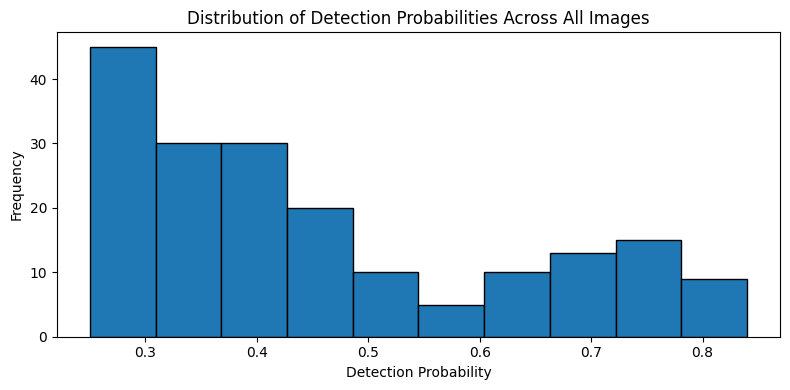

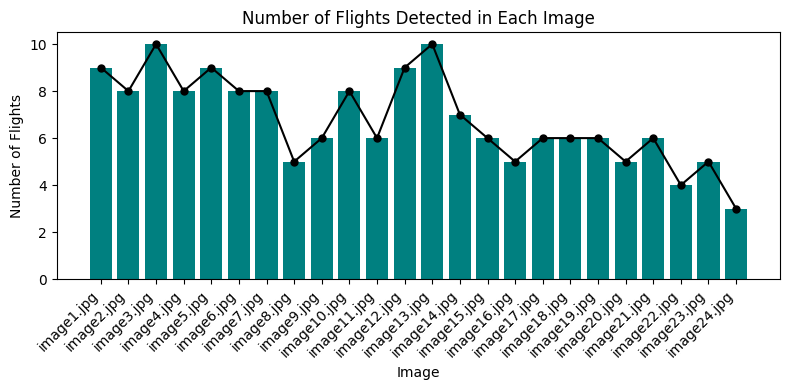

In [13]:
# Function call for the flight detection results
videoPath="/content/runway.mp4"
imagedir= "imagesnap"
detectionSystem(imagedir,videoPath)

## Object detection for sample image input


image 1/1 /content/imagesnap/image8.jpg: 384x640 1 motorcycle, 5 airplanes, 145.8ms
Speed: 3.8ms preprocess, 145.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


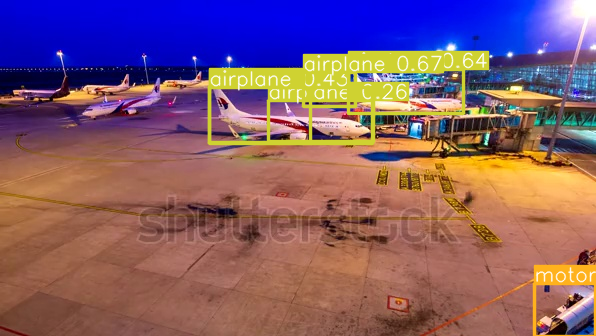

In [14]:
results = model("imagesnap/image8.jpg")  # predict on a custom image
Image.fromarray(results[0].plot()[:,:,::-1]) # Sample image detection results